# Question 10B: 3-step and 2-Step Adams-Bashforth Methods

The more general form of a first order Ordinary Differential Equation is: $$ y′=f(x,y) $$
 
This can be solved analytically by integrating both sides but this is not straight forward for most problems. Numerical methods can be used to approximate the solution at discrete points.

$$ y' = f(x,y) = \frac{x^{3}}{y} $$ 

Initial Condition $ y(0) = 1 $

Boundary $ 0 \le x \le 10 $

Step Size $ h = 0.01 $

Actual Solution $ y(x) = \sqrt{\frac{1}{2}x^{4}+1} $





In [1]:
## Library
import numpy as np
import math 

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots
import warnings

warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

## Defining the Function

In [2]:
def myfun_xy(x,y):
    return (x**3*y)


## Discrete Interval 
Here we will use two different steps sizes on the  $ 0 \leq x \leq 10 $.
### Interval
The step Size will be $h = 0.01$

with the discrete time steps,
$$ x_{i} = 0 + i0.01 $$
for  $i=0,1,...,1000$.

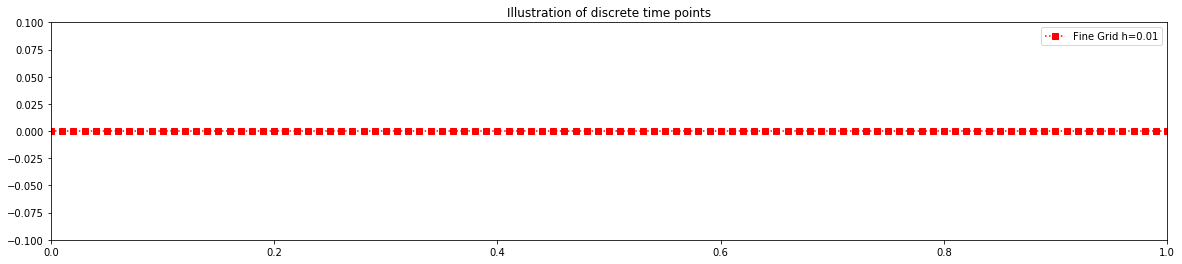

In [3]:
# Start and end of interval
b=2
a=0
# Steps N1=400
N1=200
h1=0.01


x1=np.arange(a,b+h1,h1)
#x2=np.arange(a,b+h2,h2)

fig = plt.figure(figsize=(20,4))
plt.plot(x1,0*x1,'s:',color='red',label='Fine Grid h=%s'%(h1))
#plt.plot(x2,0*x2+.05,'v:',color='blue',label='Fine Grid h=%s'%(h2))

plt.xlim((0,1))
plt.ylim((-0.1,0.1))
plt.title('Illustration of discrete time points')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Analytic (Exact) solution')

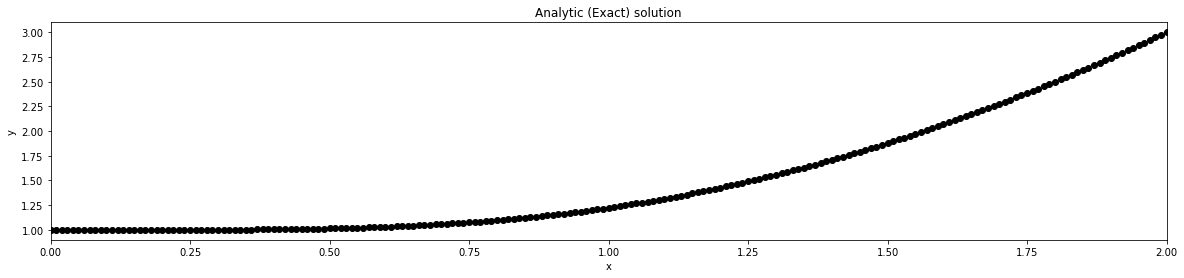

In [4]:
## Analytic Solution y
y1= (0.5*x1**4+1)**0.5


fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black')
#plt.plot(x2,y2,'v:',color='blue')
plt.xlim((0,2))
plt.xlabel('x')
plt.ylabel('y')

plt.title('Analytic (Exact) solution')

## Setting up the inital Conditions
$$ w_{0} = 1 $$

In [5]:
# Initial Condition
IC=1
w1=np.zeros(N1+1)
w1[0]=IC
w1[1]=y1[1]

w2=np.zeros(N1+1)
w2[0]=IC
w2[1]=y1[1]
w2[2]=y1[2]


## 2-step Adams Bashforth

The general 2-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{2}(3f(x_i,w_i)-f(x_{i-1},w_{i-1})). $$

for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{2}(3f(x_0,w_0)-f(x_{-1},w_{-1})), $$
this is not solvable as <font color='red'> $w_{-1}$ </font>is unknown.
for $i=1$ the difference equation is:
$$w_{2} = w_{1} + \frac{h}{2}(3f(x_1,w_1)-f(x_{0},w_{0})), $$
this is not solvable as <font color='red'> $w_{1}$ </font>is unknown, but it can be approximated using a one step method.
Here, as the exact solution is known,
$$w_1=\frac{20}{1 + 19e^{\frac{-x}{4}}}$$




## 3-step Adams Bashforth

The general 3-step Adams Bashforth difference equation is
$$w_{i+1} = w_{i} + \frac{h}{12}(23f(x_i,w_i)-16f(x_{i-1},w_{i-1})+5f(x_{i-2},w_{i-2})). $$


for $i=0$ the difference equation is:
$$w_{1} = w_{0} + \frac{h}{12}(23f(x_0,w_0)-16f(x_{-1},w_{-1})+5f(x_{-2},w_{-2})), $$
this is not solvable as <font color='red'> $w_{-1}$  and $w_{-2}$</font>is unknown.
for $i=1$ the difference equation is:
$$w_{3} = w_{2} + \frac{h}{12}(23f(x_{2},w_{2})-16f(x_{1},w_{1})+5f(x_{0},w_{0}), $$
this is not solvable as <font color='red'> $w_{1}$ and $w_{2}$ </font> are unknown, but it can be approximated using a one step method.
Here, as the exact solution is known,
$$w_1=\frac{20}{1 + 19e^{\frac{-x}{4}}}$$

Text(0.5, 1.0, 'Analytic and AB2 & AB3 Methods solution')

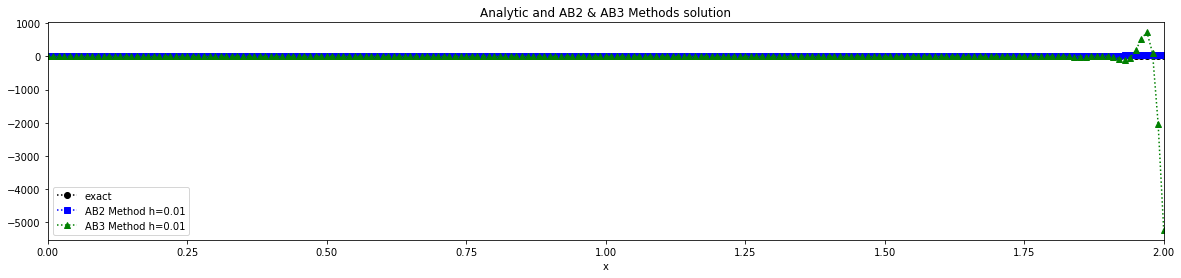

In [8]:
for k in range (1,N1):
    w1[k+1]=w1[k]+h1/2.0*(3*myfun_xy(x1[k],w1[k])-myfun_xy(x1[k-1],w1[k-1])) 
    
for k in range (2,N1):
    w2[k+1]=w2[k]+h1/12.0*(23*myfun_xy(x1[k],w2[k])-16*myfun_xy(x1[k-1],w2[k-1]+5*myfun_xy(x1[k-2],w2[k-2]))) 
    

fig = plt.figure(figsize=(20,4))
plt.plot(x1,y1,'o:',color='black',label='exact')
plt.plot(x1,w1,'s:',color='blue',label='AB2 Method h=0.01')
plt.plot(x1,w2,'^:',color='green',label='AB3 Method h=0.01')

plt.xlim((0,2))
plt.xlabel('x')
plt.legend(loc='best')
plt.title('Analytic and AB2 & AB3 Methods solution')


In [7]:
table = ListTable()
table.append(['x', 'w1 AB2 h=0.01', 'w2 AB3 h=0.01','Exact',
              'AB2 Err 0.01', '% Err AB2 0.01',
             'AB3 Err 0.01', '% Err AB3 0.01'])
tableSize = 20
for i in range (0,tableSize+1):
    table.append([round(x1[i],5), round(w1[i],5), round(w2[i],5), round(y1[i],5),
                  round(abs(y1[i]-w1[i]),8), 
                 round(abs(y1[i]-w1[i])/abs(y1[i])*100,5),
                 round(abs(y1[i]-w2[i]),8), 
                 round(abs(y1[i]-w2[i])/abs(y1[i])*100,5)])
    
table.append(['Max',' ' ,' ' , ' '
              , round(max(abs(y1-w1)),8) ,' ', round(max(abs(y1-w2)),8)])
table

x,w1 AB2 h=0.01,w2 AB3 h=0.01,Exact,AB2 Err 0.01,% Err AB2 0.01,AB3 Err 0.01,% Err AB3 0.01
0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0.01,1.0,1.0,1.0,0.0,0.0,0.0,0.0
0.02,1.0,1.0,1.0,2e-08,0.0,0.0,0.0
0.03,1.0,1.0,1.0,7e-08,1e-05,2e-08,0.0
0.04,1.0,1.0,1.0,1.4e-07,1e-05,5e-08,0.0
0.05,1.0,1.0,1.0,2.4e-07,2e-05,1.1e-07,1e-05
0.06,1.0,1.0,1.0,3.6e-07,4e-05,2.4e-07,2e-05
0.07,1.00001,1.00001,1.00001,5.1e-07,5e-05,5.3e-07,5e-05
0.08,1.00001,1.00001,1.00001,6.8e-07,7e-05,1.07e-06,0.00011
0.09,1.00002,1.00001,1.00002,8.8e-07,9e-05,2e-06,0.0002
